# **Step 1: Define real world coordinates with checkerboard pattern-**
But for simplicity, we can say chess board was kept stationary at XY plane, (so Z=0 always) and camera was moved accordingly. This consideration helps us to find only X,Y values. Now for X,Y values, we can simply pass the points as (0,0), (1,0), (2,0), ... which denotes the location of points. In this case, the results we get will be in the scale of size of chess board square. But if we know the square size, (say 30 mm), and we can pass the values as (0,0),(30,0),(60,0),..., we get the results in mm. (In this case, we don’t know square size since we didn’t take those images, so we pass in terms of square size).

3D points are called object points and 2D image points are called image points.

# **Step 2: Find 2D coordinates of checkerboard** 
*retval, corners = cv2.findChessboardCorners(image, patternSize, flags)*
 
 In this model , we use 7x6 grid. (Normally a chess board has 8x8 squares and 7x7 internal corners). It returns the corner points and retval which will be True if pattern is obtained. These corners will be placed in an order (from left-to-right, top-to-bottom).

#  Refine checkerboard corners
*cv2.cornerSubPix(image, corners, winSize, zeroZone, criteria)*

OpenCV’s function cornerSubPix takes in the original image, and the location of corners, and looks for the best corner location inside a small neighborhood of the original location. Basically it increases accuracy.



# Step 3: Calibrate Camera 

*retval, cameraMatrix, distCoeffs, rvecs, tvecs = cv2.calibrateCamera(objectPoints, imagePoints, imageSize)*

The final step of calibration is to pass the 3D points in world coordinates and their 2D locations in all images to OpenCV’s calibrateCamera method.









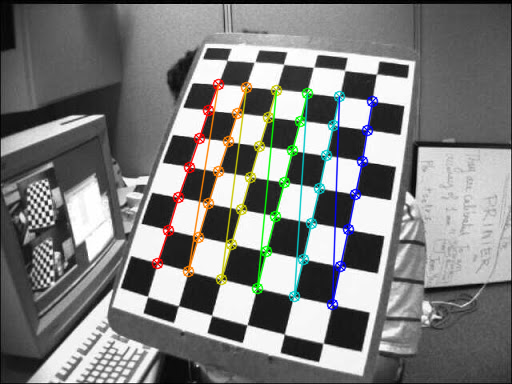

In [49]:
import numpy as np
import cv2 as cv
import glob

# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('/content/chess.jpg')

for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (7,6),None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        corners2 = cv.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('chess.jpg', cv2.IMREAD_UNCHANGED)
img = cv.drawChessboardCorners(img, (7,6), corners2,ret)
cv2_imshow(img)
cv2.destroyAllWindows()

In [72]:
#Calibration
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)


In [73]:
img = cv2.imread('/content/left14.jpg')
h,  w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

In [75]:
# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

#crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult.png',dst)

True